# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
crop_data=pd.read_csv('/content/Crop_recommendation.csv')

In [3]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop_data.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1023,80,71,47,27.505277,80.797840,6.156373,105.077699,banana
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
766,34,66,19,32.970305,60.181221,7.586642,73.446787,blackgram
155,95,38,22,19.849394,61.245001,5.730617,100.768925,maize
1218,28,122,197,19.893639,82.733664,5.856575,69.662568,grapes
424,16,71,24,18.331248,38.409755,4.946370,139.648332,pigeonpeas
1146,36,19,32,27.107108,50.708810,4.942950,92.372389,mango
1870,26,18,27,27.459078,92.907365,5.836075,142.143000,coconut
1860,20,29,27,25.098977,92.360995,6.047044,157.759263,coconut
934,8,25,36,19.913305,94.950314,6.828522,104.027706,pomegranate


In [6]:
crop_data.shape

(2200, 8)

In [7]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
crop_data.duplicated().sum()

0

In [10]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
crop_data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [14]:
crop_summery=pd.pivot_table(crop_data,index=['label'],aggfunc='mean')
crop_summery

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


# DATA VISUALIZATION

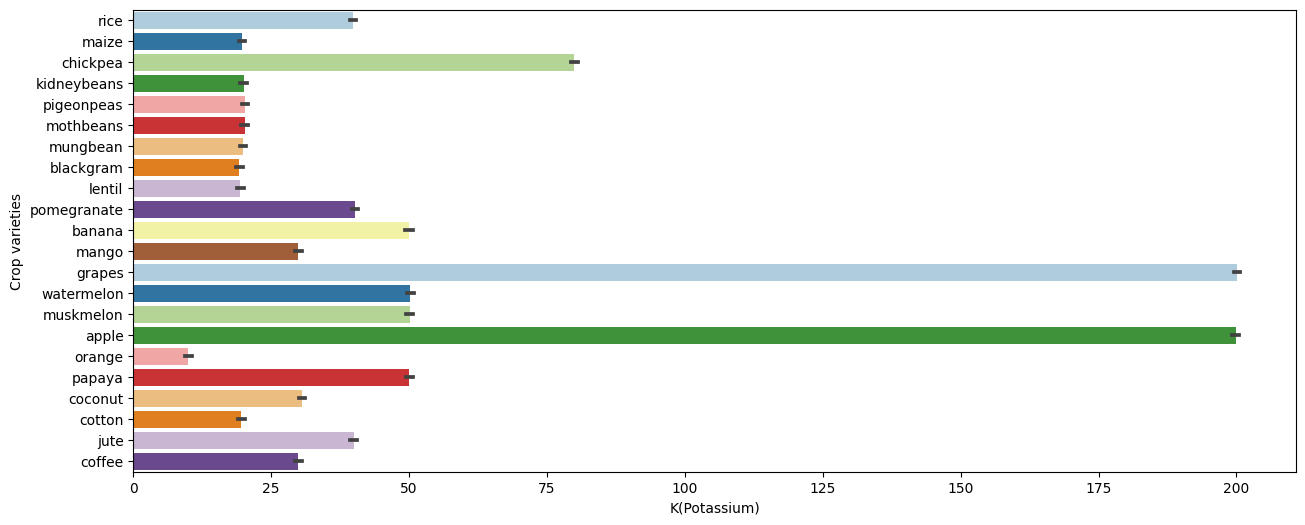

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='K',y='label',data=crop_data,palette='Paired')
plt.xlabel('K(Potassium)')
plt.ylabel('Crop varieties')
plt.show()

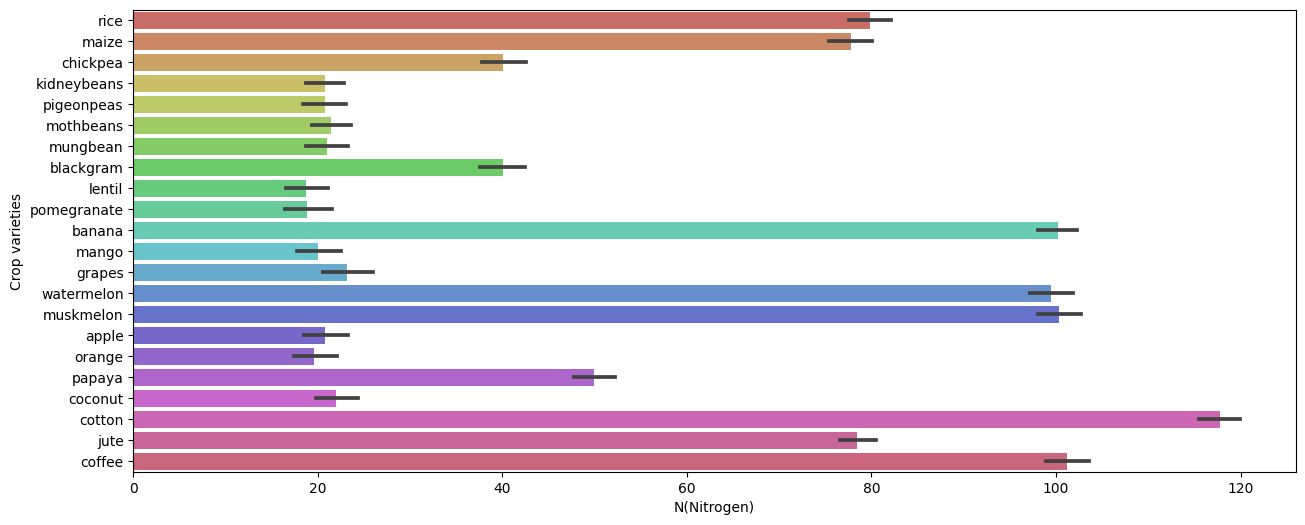

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x='N',y='label',data=crop_data,palette='hls')
plt.xlabel('N(Nitrogen)')
plt.ylabel('Crop varieties')
plt.show()

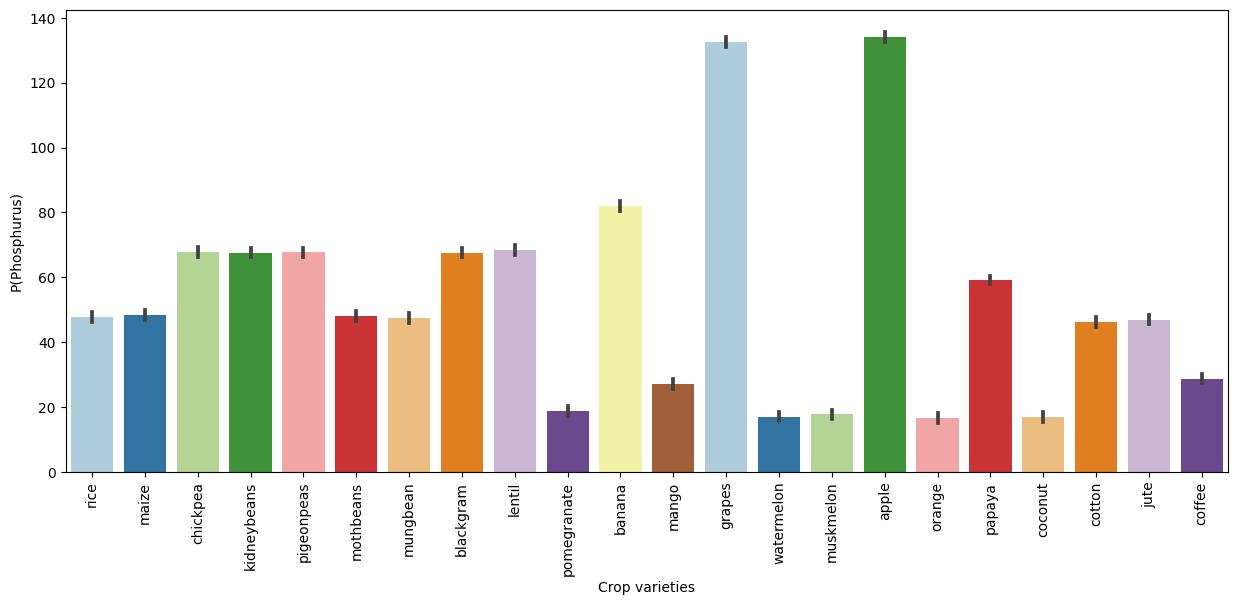

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x='label',y='P',data=crop_data,palette='Paired')
plt.ylabel('P(Phosphurus)')
plt.xlabel('Crop varieties')
plt.xticks(rotation=90)
plt.show()

In [18]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [19]:
import plotly.express as px
fig = px.bar(crop_summery, x=crop_summery.index, y=["rainfall","temperature","humidity"], title="Comparision between rainfall,temperature and humidity").update_layout(
    xaxis_title="Crop Varieties", yaxis_title="Value")
fig.show()

In [20]:
import plotly.express as px
fig = px.bar(crop_summery, x=crop_summery.index, y=["N","K","P"], title="Comparision between Nitrogen,Potassium and Phosphurus").update_layout(
    xaxis_title="Crop Varieties", yaxis_title="Value")
fig.show()

In [21]:
crop_scatter = crop_data[(crop_data['label']=='rice') |
(crop_data['label']=='jute') |
(crop_data['label']=='cotton') | (crop_data['label']=='maize') |
(crop_data['label']=='lentil')]
fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label")
fig.update_layout (plot_bgcolor="black")
fig.update_xaxes (showgrid=True)
fig.update_yaxes (showgrid=True)
fig.show()

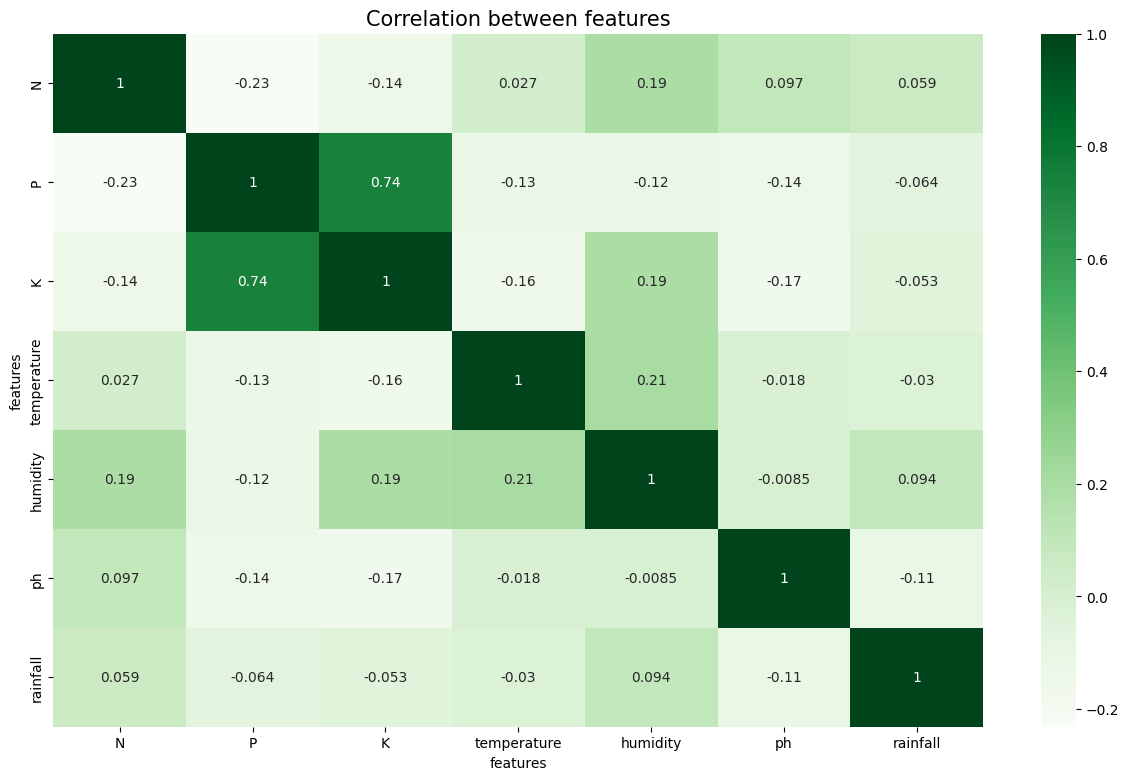

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop_data.corr(), annot=True, cmap='Greens')
ax.set(xlabel='features') 
ax.set(ylabel='features')
plt.title('Correlation between features', fontsize= 15, c='black') 
plt.show()

In [23]:
# sns.pairplot(crop_data)

In [25]:
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# TRAIN_TEST SPLIT

In [26]:
x=crop_data.drop(columns='label',axis=1)
y=crop_data['label']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10,shuffle=True)

In [28]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(2200, 7) (1540, 7) (660, 7)
(2200,) (1540,) (660,)


# MODEL BUILDING

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# MODEL EVALUATION

In [30]:
#Training Data
X_train_prediction=model.predict(x_train)
Training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print('Training_data_accuracy:',Training_data_accuracy)

Training_data_accuracy: 0.9714285714285714


In [31]:
#Testing Data
X_test_prediction=model.predict(x_test)
Testing_data_accuracy=accuracy_score(X_test_prediction,y_test)
print('Testing_data_accuracy:',Testing_data_accuracy)

Testing_data_accuracy: 0.9606060606060606


In [32]:
crop_data['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

# BUILDING A PREDICTION SYSTEM

In [33]:
input_data=np.array([[34,71,79,17.927806,15.85622899,7.728998197,74.63872762]])
prediction=model.predict(input_data)
# print(prediction)

if(prediction[0]=='rice'):
  print('The Recommended Crop is Rice')
elif(prediction[0]=='coffee'):
  print('The Recommended Crop is coffee')
elif(prediction[0]=='maize'):
  print('The Recommended Crop is Maize')
elif(prediction[0]=='jute'):
  print('The Recommended Crop is Jute')
elif(prediction[0]=='coconut'):
  print('The Recommended Crop is Coconut')
elif(prediction[0]=='cotton'):
  print('The Recommended Crop is Cotton')
elif(prediction[0]=='papaya'):
  print('The Recommended Crop is Papaya')
elif(prediction[0]=='orange'):
  print('The Recommended Crop is Orange')
elif(prediction[0]=='apple'):
  print('The Recommended Crop is Apple')  
elif(prediction[0]=='muskmelon'):
  print('The Recommended Crop is Muskmelon') 
elif(prediction[0]=='watermelon'):
  print('The Recommended Crop is Watermelon') 
elif(prediction[0]=='grapes'):
  print('The Recommended Crop is Grapes')  
elif(prediction[0]=='mango'):
  print('The Recommended Crop is Mango')  
elif(prediction[0]=='banana'):
  print('The Recommended Crop is Banana')  
elif(prediction[0]=='pomegranate'):
  print('The Recommended Crop is Pomegranate')
elif(prediction[0]=='lentil'):
  print('The Recommended Crop is Lentil')
elif(prediction[0]=='blackgram'):
  print('The Recommended Crop is Blackgram')
elif(prediction[0]=='mungbean'):
  print('The Recommended Crop is Mungbean')
elif(prediction[0]=='mothbeans'):
  print('The Recommended Crop is Mothbeans')
elif(prediction[0]=='pigeonpeas'):
  print('The Recommended Crop is Pigeonpeas') 
elif(prediction[0]=='kidneybeans'):
  print('The Recommended Crop is Kidneybeans')
else:
  print('The Recommended Crop is Chickpea')



The Recommended Crop is Chickpea


# Deploying Model

# Dumping our Model

In [34]:
import pickle
with open("model.pkl","wb")as files:
    pickle.dump(model,files)